X: [0.04402679 0.03119464 0.02752214 0.01469    0.00553035 0.00920285
 0.00920285 0.0110175  0.         0.02566429 0.01650464 0.02566429
 0.02566429 0.01283215 0.022035   0.03486714 0.02566429 0.03119464
 0.02752214 0.02933679 0.04951393 0.04951393 0.05318643 0.04216893
 0.05685893 0.06783323 0.07150572 0.06783323 0.06969108 0.07332037
 0.06969108 0.06783323 0.07517822 0.06601858 0.08615252 0.08615252
 0.08252322 0.08066537 0.07517822 0.07885072 0.08252322 0.08801037
 0.09535537 0.08982502 0.09168287 0.10632966 0.10265716 0.10818751
 0.10632966 0.10265716 0.10084251 0.10265716 0.10084251 0.10265716
 0.10265716 0.11548931 0.11181681 0.09168287 0.08982502 0.08615252], Y: 0.09349751566213005
X: [0.03119464 0.02752214 0.01469    0.00553035 0.00920285 0.00920285
 0.0110175  0.         0.02566429 0.01650464 0.02566429 0.02566429
 0.01283215 0.022035   0.03486714 0.02566429 0.03119464 0.02752214
 0.02933679 0.04951393 0.04951393 0.05318643 0.04216893 0.05685893
 0.06783323 0.07150572 0.067833

X: [0.83210197 0.84908188 0.85543314 0.83633614 0.83845323 0.84057032
 0.83845323 0.82782458 0.83845323 0.83421905 0.8257075  0.81723914
 0.81723914 0.83421905 0.85971052 0.85543314 0.85971052 0.85543314
 0.9021819  0.96591056 0.95104774 0.94465327 0.97226183 0.9764528
 0.94223374 0.93151869 0.95078851 0.94223374 0.94651113 0.95506589
 0.96789803 0.93795636 0.94435083 0.99356232 0.94651113 0.94435083
 0.91224887 0.95506589 0.97861309 0.98500756 1.         0.99783971
 0.93367898 0.95078851 0.95078851 0.91656945 0.9036941  0.86947505
 0.96146036 0.9294016  0.93151869 0.93367898 0.89729963 0.93579607
 0.94862821 0.96789803 0.96362065 0.94007345 0.91013178 0.90157701], Y: 0.9251242168934977
X: [0.84908188 0.85543314 0.83633614 0.83845323 0.84057032 0.83845323
 0.82782458 0.83845323 0.83421905 0.8257075  0.81723914 0.81723914
 0.83421905 0.85971052 0.85543314 0.85971052 0.85543314 0.9021819
 0.96591056 0.95104774 0.94465327 0.97226183 0.9764528  0.94223374
 0.93151869 0.95078851 0.94223374 

Epoch 1/50
639/639 [==============================] - 1s 1ms/step - loss: 0.0429
Epoch 2/50
639/639 [==============================] - 0s 260us/step - loss: 0.0021
Epoch 3/50
639/639 [==============================] - 0s 234us/step - loss: 0.0018
Epoch 4/50
639/639 [==============================] - 0s 271us/step - loss: 0.0017
Epoch 5/50
639/639 [==============================] - 0s 235us/step - loss: 0.0016
Epoch 6/50
639/639 [==============================] - 0s 245us/step - loss: 0.0015
Epoch 7/50
639/639 [==============================] - 0s 268us/step - loss: 0.0015
Epoch 8/50
639/639 [==============================] - 0s 242us/step - loss: 0.0014
Epoch 9/50
639/639 [==============================] - 0s 248us/step - loss: 0.0014
Epoch 10/50
639/639 [==============================] - 0s 245us/step - loss: 0.0013
Epoch 11/50
639/639 [==============================] - 0s 274us/step - loss: 0.0012
Epoch 12/50
639/639 [==============================] - 0s 255us/step - loss: 0.0012
Epo

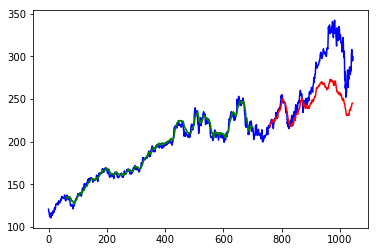

In [2]:
import numpy as np  #陣列模組；
from matplotlib import pyplot as plt   #繪圖模組；
from pandas import read_csv #匯入CSV檔案成dataframe結構;
import math #匯入數學模組，計算均方根差使用;
from keras.models import Sequential #引入Kears模組的序列模型，此模型是將所有層線性疊加；
from keras.layers import Dense #輸出層使用全連線層;
from keras.layers import LSTM #引入LSTM層;
from sklearn.preprocessing import MinMaxScaler #資料標準化
from sklearn.metrics import mean_squared_error #均方根差，矩陣計算;
import pandas as pd


resource_data = './2330.TW.csv'
seed = 7  #隨機種子
batch_size = 10 #每批過神經網路的大小;
epochs = 50 #神經網路訓練的輪次
look_back=60

#此函式的目的是將輸入的每日的進件量資料作為輸入和輸出，Y是X的下一個輸出;

def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        x = dataset[i: i + look_back, 0]
        dataX.append(x)
        y = dataset[i + look_back, 0]
        dataY.append(y)
        print('X: %s, Y: %s' % (x, y))
    return np.array(dataX), np.array(dataY)

#隱藏層4個，input_shape是輸入資料格式，LSTM 層輸入格式: 為矩陣,矩陣內容 [ samples, time steps, features ] samples:觀測值，time steps:對於給定的觀測值,給定變數有單獨的時間步--就是時間視窗 features:在得到觀測值的時刻,觀測到的單獨的 measures--就是列數(屬性個數) ;

def build_model():
    model = Sequential()
    model.add(LSTM(units=4, input_shape=(1, look_back))) 
    model.add(Dense(units=1)) #輸出層採用全連線層;
    model.compile(loss='mean_squared_error', optimizer='adam') #損失函式是均方差，優化器是採用adam;
    return model


# 設定隨機種子,目的是使得可以復現神經網路訓練的結果;
np.random.seed(seed)

# 匯入資料
dataset = pd.read_csv(resource_data)
dataset = dataset.iloc[:, 1:2].values 

# 標準化資料
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.67) #訓練資料
validation_size = len(dataset) - train_size #測試資料
train, validation = dataset[0: train_size, :], dataset[train_size: len(dataset), :]

# 建立dataset，讓資料產生相關性
X_train, y_train = create_dataset(train)
X_validation, y_validation = create_dataset(validation)

# 將輸入轉化成為【sample， time steps, feature]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_validation = np.reshape(X_validation, (X_validation.shape[0], 1, X_validation.shape[1]))

# 訓練模型
model = build_model()
model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, )

# 模型預測資料
predict_train = model.predict(X_train)
predict_validation = model.predict(X_validation)

# 反標準化資料 --- 目的是保證MSE的準確性
predict_train = scaler.inverse_transform(predict_train)
y_train = scaler.inverse_transform([y_train])
predict_validation = scaler.inverse_transform(predict_validation)
y_validation = scaler.inverse_transform([y_validation])

# 評估模型
train_score = math.sqrt(mean_squared_error(y_train[0], predict_train[:, 0]))
print('Train Score: %.2f RMSE' % train_score)
validation_score = math.sqrt(mean_squared_error(y_validation[0], predict_validation[:, 0]))
print('Validatin Score: %.2f RMSE' % validation_score)

# 構建通過訓練集進行預測的圖表資料
predict_train_plot = np.empty_like(dataset)
predict_train_plot[:, :] = np.nan
predict_train_plot[look_back:len(predict_train) + look_back, :] = predict_train

# 構建通過評估資料集進行預測的圖表資料
predict_validation_plot = np.empty_like(dataset)
predict_validation_plot[:, :] = np.nan
predict_validation_plot[len(predict_train) + look_back * 2 + 1:len(dataset) - 1, :] = predict_validation

# 圖表顯示
dataset = scaler.inverse_transform(dataset)
plt.plot(dataset, color='blue')
plt.plot(predict_train_plot, color='green')
plt.plot(predict_validation_plot, color='red')
plt.show()

